<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


C:\Users\LAPTOP INSIDE\AppData\Local\Temp\ipykernel_18064\1360968790.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\LAPTOP INSIDE\AppData\Local\Temp\ipykernel_18064\1360968790.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

              precision    recall  f1-score   support

           0       0.82      0.85      0.83       105
           1       0.77      0.73      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179



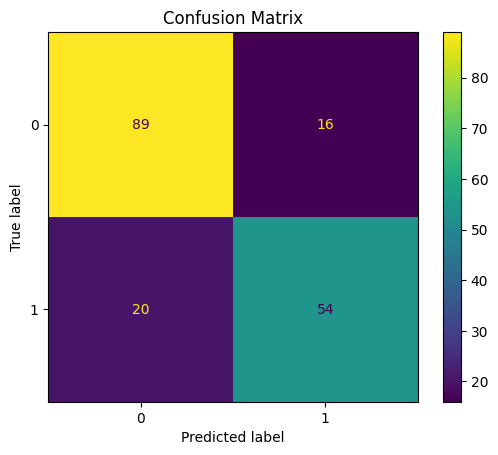

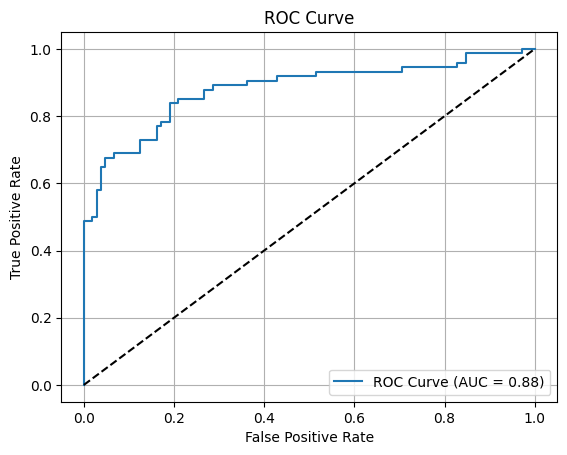

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")
df.info()
# Preprocess
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Embarked'] = df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression().fit(X_train, y_train)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Classification report
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


C:\Users\LAPTOP INSIDE\AppData\Local\Temp\ipykernel_18064\457164789.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\LAPTOP INSIDE\AppData\Local\Temp\ipykernel_18064\457164789.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

   Survived  Pclass  Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3   22      1      0   7.2500      True       False   
1         1       1   38      1      0  71.2833     False       False   
2         1       3   26      0      0   7.9250     False       False   
3         1       1   35      1      0  53.1000     False       False   
4         0       3   35      0      0   8.0500      True       False   

   Embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  
Selected Features: ['Pclass', 'SibSp', 'Sex_male', 'Embarked_Q', 'Embarked_S']
              precision    recall  f1-score   support

           0       0.82      0.78      0.80       105
           1       0.71      0.76      0.73        74

    accuracy                           0.77       179
   macro avg       0.76      0.77      0.77       179
weighted avg       0.77      0.77      0.77       179



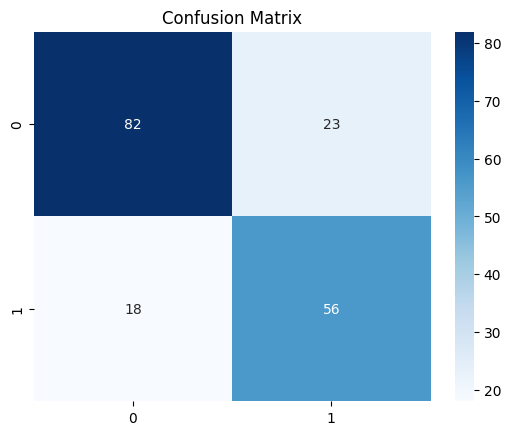

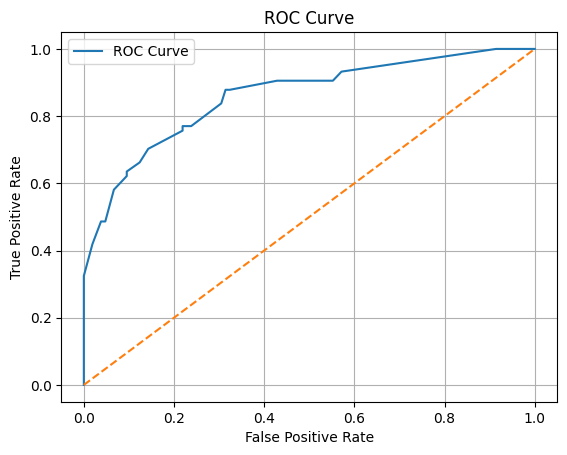

ROC AUC Score: 0.8596525096525097


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('Titanic-Dataset.csv')


# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Convert categorical to numeric
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

# Drop only the columns that are present
df = df.drop(columns=[col for col in ['PassengerId', 'Name', 'Ticket', 'Cabin'] if col in df.columns])

print(df.head())
# Features and Target
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression with RFE
model = LogisticRegression(max_iter=1000)
rfe = RFE(model, n_features_to_select=5)
rfe.fit(X_train, y_train)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", list(selected_features))

# Evaluate model
y_pred = rfe.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
y_prob = rfe.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


C:\Users\LAPTOP INSIDE\AppData\Local\Temp\ipykernel_18064\1585426584.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\LAPTOP INSIDE\AppData\Local\Temp\ipykernel_18064\1585426584.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       105
           1       0.79      0.80      0.79        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

Accuracy:  0.8268
Precision: 0.7867
Recall:    0.7973
F1 Score:  0.7919


<Figure size 600x400 with 0 Axes>

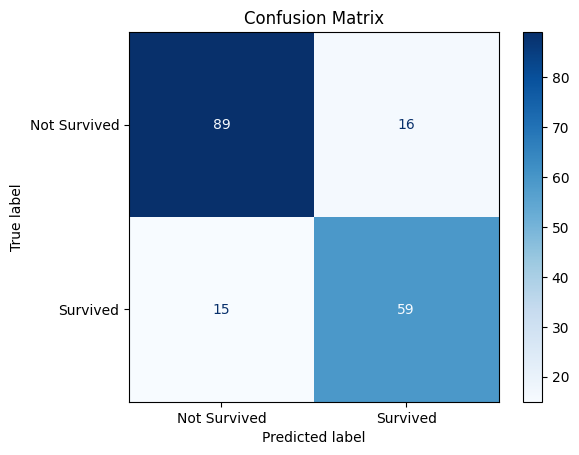

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")  # Replace with your dataset path

# ----- Feature Engineering -----

# Extract Title from Name
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)

# Create Family feature (SibSp + Parch)
df['Family'] = df['SibSp'] + df['Parch']

# Select required features
df = df[['Survived', 'Pclass', 'Title', 'Sex', 'Age', 'Family', 'Fare', 'Embarked']]

# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# ----- Splitting Features and Labels -----
X = df.drop('Survived', axis=1)
y = df['Survived']

# ----- Preprocessing Pipeline -----

# Numerical columns to scale
num_features = ['Age', 'Fare', 'Family']
# Categorical columns to encode
cat_features = ['Pclass', 'Title', 'Sex', 'Embarked']

# Create preprocessing transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
    ]
)

# ----- ML Pipeline -----
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# ----- Train/Test Split -----
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Model Training -----
pipeline.fit(X_train, y_train)

# ----- Evaluation -----
y_pred = pipeline.predict(X_test)



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Print classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Print individual metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Survived", "Survived"])

# Plot
plt.figure(figsize=(6,4))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


C:\Users\LAPTOP INSIDE\AppData\Local\Temp\ipykernel_12112\1182761727.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\LAPTOP INSIDE\AppData\Local\Temp\ipykernel_12112\1182761727.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Classification Report:

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



<Figure size 600x400 with 0 Axes>

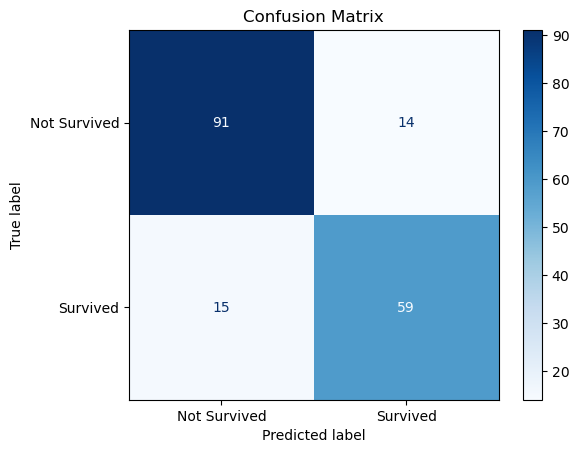

In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")  # Replace with your actual file path

# ----- Feature Engineering -----
df['Title'] = df['Name'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
df['Family'] = df['SibSp'] + df['Parch']
df = df[['Survived', 'Pclass', 'Title', 'Sex', 'Age', 'Family', 'Fare', 'Embarked']]

# Fill missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Features and labels
X = df.drop('Survived', axis=1)
y = df['Survived']

# Split before pipeline for RFE use
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Preprocessing -----
numeric_features = ['Age', 'Fare', 'Family']
categorical_features = ['Pclass', 'Title', 'Sex', 'Embarked']

preprocessor = ColumnTransformer(transformers=[
    ('num', MinMaxScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# ----- Fit Preprocessor and Transform Data -----
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# ----- RFE for Feature Selection -----
# Using Logistic Regression as the estimator
estimator = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=estimator, n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_preprocessed, y_train)
X_test_rfe = rfe.transform(X_test_preprocessed)

# ----- Train Final Model -----
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_train_rfe, y_train)

# ----- Predict and Evaluate -----
y_pred = final_model.predict(X_test_rfe)

print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Not Survived", "Survived"])
plt.figure(figsize=(6,4))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
